### Model


In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()
#reklam harcaması ile satışların ilişkisi

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


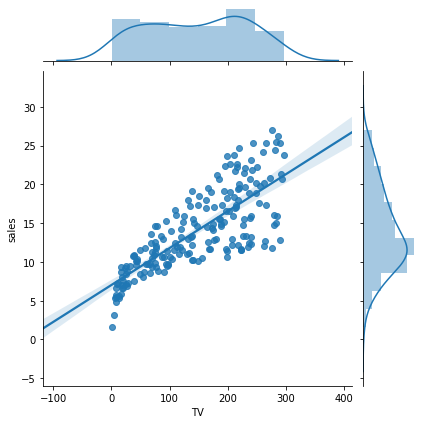

In [37]:
import seaborn as sns
sns.jointplot(x ="TV",y = "sales",data =df ,kind = "reg")

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
x = df[["TV"]]
y= df[["sales"]]

In [40]:
reg = LinearRegression() #model nesnesi oluşturma

In [41]:
model = reg.fit(x,y) #modeli kurmak burası

In [42]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
dir(model) #içinden alabileceklerimiz

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [44]:
model.intercept_ #b0 değeri

array([7.03259355])

In [45]:
model.coef_ #b1 katsayısı

array([[0.04753664]])

In [46]:
model.score(x,y) #model skoru "r kare"

0.611875050850071

### Tahmin

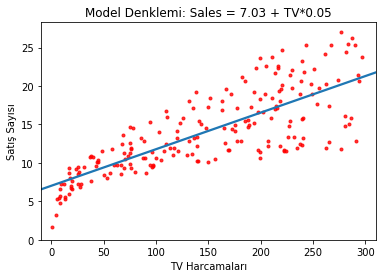

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci = None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [48]:
model.predict([[165]])#tahmin et demek 

array([[14.87613922]])

In [49]:
yeni_veri = [[5],[15],[30]]
model.predict(yeni_veri) #çoklu tahmin yapabiliriz

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Artıklar ve Makine Öğrenmesindeki Önemi
1. MSE: Hata Kareler Ortalaması 
2. RMSE: Hata Kareler Ortalamasının Karekökü

In [50]:
y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [51]:
model.predict(x)[0:6] #ilk 6 için tahmin değerleri

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [52]:
gercek_y = y[0:10]

In [53]:
tahminedilen_y = pd.DataFrame(model.predict(x)[0:10])

In [54]:
hatalar = pd.concat([gercek_y,tahminedilen_y],axis = 1)

In [55]:
hatalar.columns= ["gercek_y","tahminedilen_y"]

In [56]:
hatalar["hata"] = hatalar["gercek_y"]- hatalar["tahminedilen_y"]

In [57]:
hatalar

,gercek_y,tahminedilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [58]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [59]:
hatalar

,gercek_y,tahminedilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [61]:
np.mean(hatalar["hata_kareler"]) #hata kareler ortalaması budur

9.290350329638105